Import Libraries

In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

Load the dataset

In [239]:
data = pd.read_csv('iris.csv', header=None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [240]:
# Assign columns to the dataset
data.columns = ['sepal_length', 'sepal_width', 'petal_length' , 'petal_width', 'label']
data.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [241]:
data.label.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: label, dtype: int64

In [242]:
# Get the shape of the dataset
data.shape

(150, 5)

<AxesSubplot:>

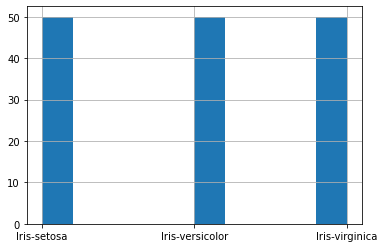

In [243]:
data.label.hist()

The histogram shows that we have equal value for the three classes

In [244]:
# Assign the target and the independent variables
X = data[['petal_length', 'petal_width']] # Only petal attributes are used

# X = data[['sepal_length', 'sepal_width','petal_length', 'petal_width']] # Using sepal and petal attributes

y = data['label']

In [245]:
y.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: label, dtype: int64

In [246]:
# Function to calculate Eucludian distance
def distance(instance, data):
    dist = []
    for j in data.index: 
        dist.append([np.linalg.norm(instance - data.iloc[j,:]), j])
    return sorted(dist)

In [247]:
# New instances to classify
new_instance = np.array([[ 4.5, 4, 5, 2] , [2, 2.5, 4, 3], [6, 2, 3,2]])
# Assign dist1 to first Instance
dist1 = distance(new_instance[0][2:], X)
# Assign dist2 to the second Instance
dist2 = distance(new_instance[1][2:], X)
# Assign dist2 to the second Instance
dist3 = distance(new_instance[2][2:], X)

In [248]:
# Fuction to classify the new instance with different value of k
from collections import Counter

def classify(nearest_dist, k):
    labels = []
    for i in nearest_dist[:k]:
        labels.append(y.iloc[i[1]])
    counter = Counter(labels)
    return counter.most_common()[0][0]
    


Classification of the instances for different values of k

In [249]:

# Create a new list of dictionnaries to store the new calssification

# Function to generate dictionnary
def generate_dic(instance, k):
    dic = {'sepal_length' : instance[0], 
               'sepal_width' : instance[1], 
               'petal_length' : instance[2], 
               'petal_width' : instance[3],
               'K_vlaue' : k,
               'label' : classify(distance(instance[2:], X), k) # Only petal attributes has been used
               
               # 'label' : classify(distance(instance, X), k) # Using sepal and petal Attributes
            }
    return dic

# Values of k
k_values = [3, 5, 9]

list = [] # List to store dictionnaries
for instance in new_instance:
    for k in k_values:
        list.append(generate_dic(instance, k))

In [250]:
# Generate a new data frame for the classification that we get for different values of k
predict_dataframe = pd.DataFrame(list)
predict_dataframe.set_index(keys='K_vlaue')

,sepal_length,sepal_width,petal_length,petal_width,label
K_vlaue,,,,,
3,4.5,4.0,5.0,2.0,Iris-virginica
5,4.5,4.0,5.0,2.0,Iris-virginica
9,4.5,4.0,5.0,2.0,Iris-virginica
3,2.0,2.5,4.0,3.0,Iris-virginica
5,2.0,2.5,4.0,3.0,Iris-virginica
9,2.0,2.5,4.0,3.0,Iris-virginica
3,6.0,2.0,3.0,2.0,Iris-versicolor
5,6.0,2.0,3.0,2.0,Iris-versicolor
9,6.0,2.0,3.0,2.0,Iris-versicolor


##### Using the predifined sklearn library

In [251]:
# Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=121)

In [252]:
# Train the model
from sklearn.neighbors import KNeighborsClassifier
# Function to create model for each value of k
knn_model = lambda k : KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

Training and test Accuracy of the model

In [253]:
from sklearn.metrics import accuracy_score, confusion_matrix
for k in k_values:
    train_pred = knn_model(k).predict(X_train)
    test_pred = knn_model(k).predict(X_test)
    
    print(f'For k = {k}, The Training accuracy score is {accuracy_score(y_train, train_pred)}')
    print(f'For k = {k}, The Test accuracy score is {accuracy_score(y_test, test_pred)}\n')


For k = 3, The Training accuracy score is 0.9910714285714286
For k = 3, The Test accuracy score is 0.9736842105263158

For k = 5, The Training accuracy score is 0.9553571428571429
For k = 5, The Test accuracy score is 0.9736842105263158

For k = 9, The Training accuracy score is 0.9553571428571429
For k = 9, The Test accuracy score is 0.9736842105263158



Model Confusion matrix

In [254]:
# Function to plot confusion matrix
def confusion(title, matrix):
    plt.figure(figsize=(8, 6))
    
    sns.heatmap(matrix, annot=True, cmap='ocean_r')
    # labels, title and ticks
    labels = ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.xticks([0.5, 1.5, 2.5], labels=labels)
    plt.yticks([0.5, 1.5, 2.5], labels=labels)
    plt.show()

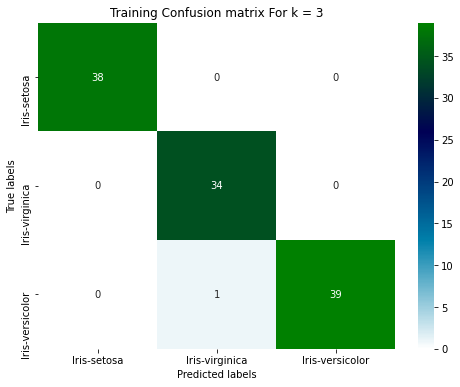

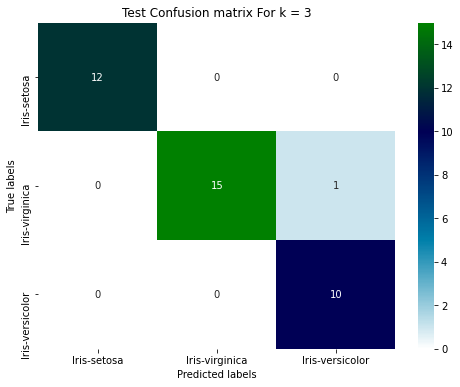

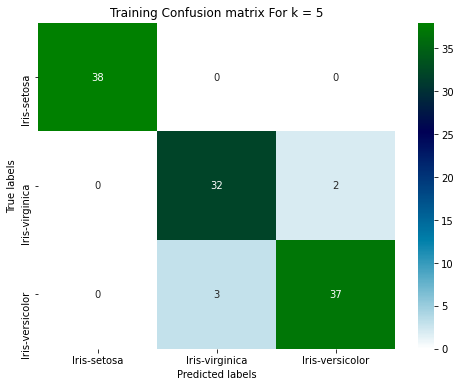

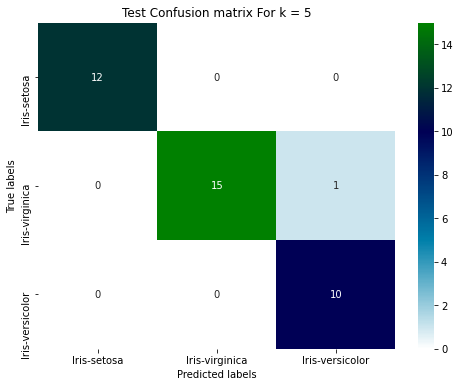

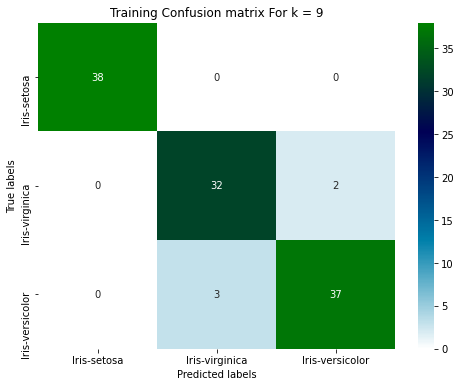

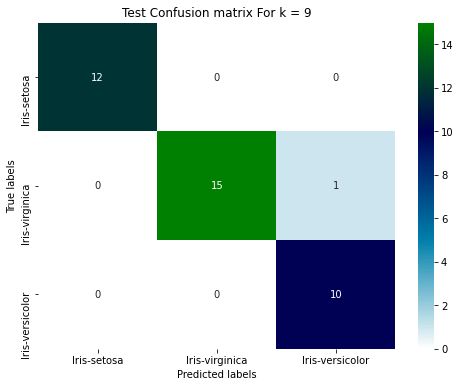

In [255]:
for k in k_values:
    train_pred = knn_model(k).predict(X_train)
    test_pred = knn_model(k).predict(X_test)
    train_conf = confusion_matrix(y_train, train_pred)
    test_conf = confusion_matrix(y_test, test_pred)
    
    confusion(f'Training Confusion matrix For k = {k}', train_conf)
    confusion(f'Test Confusion matrix For k = {k}', test_conf)


##### Classify the given instances

In [268]:
df1 = pd.DataFrame(np.resize(new_instance,4*9).reshape(9, 4))

df1.columns=['sepal_length', 'sepal_width', 'petal_length' , 'petal_width']
df1['Predicted_Class'] = np.concatenate([knn_model(3).predict(df1.iloc[:3,2:]), 
                knn_model(5).predict(df1.iloc[:3,2:]),
                knn_model(9).predict(df1.iloc[:3,2:])
            ])
df1['K_value'] = np.repeat(k_values, 3, axis=0)

df1

,sepal_length,sepal_width,petal_length,petal_width,Predicted_Class,K_value
0,4.5,4.0,5.0,2.0,Iris-virginica,3
1,2.0,2.5,4.0,3.0,Iris-virginica,3
2,6.0,2.0,3.0,2.0,Iris-versicolor,3
3,4.5,4.0,5.0,2.0,Iris-virginica,5
4,2.0,2.5,4.0,3.0,Iris-virginica,5
5,6.0,2.0,3.0,2.0,Iris-versicolor,5
6,4.5,4.0,5.0,2.0,Iris-virginica,9
7,2.0,2.5,4.0,3.0,Iris-virginica,9
8,6.0,2.0,3.0,2.0,Iris-versicolor,9


In [269]:
df1.set_index(keys='K_value')

,sepal_length,sepal_width,petal_length,petal_width,Predicted_Class
K_value,,,,,
3,4.5,4.0,5.0,2.0,Iris-virginica
3,2.0,2.5,4.0,3.0,Iris-virginica
3,6.0,2.0,3.0,2.0,Iris-versicolor
5,4.5,4.0,5.0,2.0,Iris-virginica
5,2.0,2.5,4.0,3.0,Iris-virginica
5,6.0,2.0,3.0,2.0,Iris-versicolor
9,4.5,4.0,5.0,2.0,Iris-virginica
9,2.0,2.5,4.0,3.0,Iris-virginica
9,6.0,2.0,3.0,2.0,Iris-versicolor
